# Running the VHCT Algorithm To Tune SVM on the Landmine Dataset

First of all, the required packages need to be loaded. Note that "import sys" and "sys.path.append("../") are not required when writing .py codes.

In [1]:
import sys
sys.path.append("../") # go to parent dir

from PyXAB.algos import *

from PyXAB.partition.BinaryPartition import BinaryPartition
from PyXAB.utils.plot import compare_regret, compare_regret_withsd
from PyXAB.landmine.landmine_obj import obj_func_landmine
import numpy as np
import pickle


Load the dataset, split the dataset into the training set and the testing set. Then define the objective function using the dataset.

In [2]:

landmine_data = pickle.load(open("../PyXAB/landmine/landmine_formated_data.pkl", "rb"))
all_X_train, all_Y_train, all_X_test, all_Y_test = landmine_data["all_X_train"], landmine_data["all_Y_train"], \
                                                       landmine_data["all_X_test"], landmine_data["all_Y_test"]

X_train = all_X_train[0]
Y_train = np.squeeze(all_Y_train[0])
X_test = all_X_test[0]
Y_test = np.squeeze(all_Y_test[0])

target = obj_func_landmine(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

Define the parameter domain, the partition chosen, the number of rounds, and the number of trial runs

In [3]:
domain = [[1e-4, 10.0], [1e-2, 10.0]]
partition = BinaryPartition
rounds = 500
trials = 5

Run the algorithm and record the cumulative regret of each round

In [4]:

regret_array = []
for i in range(trials):
    
    algo = VHCT.VHCT(domain=domain, rho=0.5, partition=partition)
    regret_list = []
    regret = 0
    for t in range(1, rounds + 1):
        point = algo.pull(t)
        reward = target.f(point)
        algo.receive_reward(t, reward)
        inst_regret = target.fmax - reward
        print('Trial:', i+1, 'Round: ', t, 'Instant Regret: ', inst_regret)
        regret += inst_regret
        regret_list.append(regret)

    regret_array.append(np.array(regret_list))
    

../PyXAB/algos/VHCT.py:15: RuntimeWarning: divide by zero encountered in log
  return np.power(2, np.ceil(np.log(x) / np.log(2)))
../PyXAB/algos/VHCT.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1.0 / 2, self.c1 * self.delta / t_plus)
../PyXAB/algos/VHCT.py:15: RuntimeWarning: divide by zero encountered in log
  return np.power(2, np.ceil(np.log(x) / np.log(2)))
../PyXAB/algos/VHCT.py:196: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)
../PyXAB/algos/VHCT.py:125: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)


Trial: 1 Round:  1 Instant Regret:  0.3595384615384616
Trial: 1 Round:  2 Instant Regret:  0.33261538461538454
Trial: 1 Round:  3 Instant Regret:  0.3349230769230769
Trial: 1 Round:  4 Instant Regret:  0.31938461538461516
Trial: 1 Round:  5 Instant Regret:  0.39030769230769224
Trial: 1 Round:  6 Instant Regret:  0.35923076923076924
Trial: 1 Round:  7 Instant Regret:  0.33799999999999997
Trial: 1 Round:  8 Instant Regret:  0.28246153846153854
Trial: 1 Round:  9 Instant Regret:  0.34323076923076923
Trial: 1 Round:  10 Instant Regret:  0.30492307692307696
Trial: 1 Round:  11 Instant Regret:  0.3480000000000001
Trial: 1 Round:  12 Instant Regret:  0.35869230769230764
Trial: 1 Round:  13 Instant Regret:  0.4
Trial: 1 Round:  14 Instant Regret:  0.3725384615384616
Trial: 1 Round:  15 Instant Regret:  0.2826153846153847
Trial: 1 Round:  16 Instant Regret:  0.30492307692307696
Trial: 1 Round:  17 Instant Regret:  0.35461538461538455
Trial: 1 Round:  18 Instant Regret:  0.31938461538461516
Tria

Trial: 1 Round:  156 Instant Regret:  0.35107692307692306
Trial: 1 Round:  157 Instant Regret:  0.3550769230769232
Trial: 1 Round:  158 Instant Regret:  0.37623076923076926
Trial: 1 Round:  159 Instant Regret:  0.35507692307692307
Trial: 1 Round:  160 Instant Regret:  0.14676923076923076
Trial: 1 Round:  161 Instant Regret:  0.14584615384615385
Trial: 1 Round:  162 Instant Regret:  0.15646153846153854
Trial: 1 Round:  163 Instant Regret:  0.17030769230769227
Trial: 1 Round:  164 Instant Regret:  0.1601538461538462
Trial: 1 Round:  165 Instant Regret:  0.3473846153846154
Trial: 1 Round:  166 Instant Regret:  0.35115384615384626
Trial: 1 Round:  167 Instant Regret:  0.34676923076923083
Trial: 1 Round:  168 Instant Regret:  0.3499230769230769
Trial: 1 Round:  169 Instant Regret:  0.3480769230769232
Trial: 1 Round:  170 Instant Regret:  0.2573846153846153
Trial: 1 Round:  171 Instant Regret:  0.3490769230769232
Trial: 1 Round:  172 Instant Regret:  0.20923076923076922
Trial: 1 Round:  173 

Trial: 1 Round:  312 Instant Regret:  0.149076923076923
Trial: 1 Round:  313 Instant Regret:  0.14815384615384608
Trial: 1 Round:  314 Instant Regret:  0.16646153846153855
Trial: 1 Round:  315 Instant Regret:  0.14969230769230757
Trial: 1 Round:  316 Instant Regret:  0.149076923076923
Trial: 1 Round:  317 Instant Regret:  0.16784615384615387
Trial: 1 Round:  318 Instant Regret:  0.14923076923076917
Trial: 1 Round:  319 Instant Regret:  0.14923076923076917
Trial: 1 Round:  320 Instant Regret:  0.14923076923076917
Trial: 1 Round:  321 Instant Regret:  0.16692307692307695
Trial: 1 Round:  322 Instant Regret:  0.14938461538461534
Trial: 1 Round:  323 Instant Regret:  0.14938461538461534
Trial: 1 Round:  324 Instant Regret:  0.14923076923076917
Trial: 1 Round:  325 Instant Regret:  0.16692307692307695
Trial: 1 Round:  326 Instant Regret:  0.14923076923076917
Trial: 1 Round:  327 Instant Regret:  0.14815384615384608
Trial: 1 Round:  328 Instant Regret:  0.1495384615384615
Trial: 1 Round:  32

Trial: 1 Round:  456 Instant Regret:  0.15446153846153843
Trial: 1 Round:  457 Instant Regret:  0.14492307692307693
Trial: 1 Round:  458 Instant Regret:  0.15446153846153843
Trial: 1 Round:  459 Instant Regret:  0.14492307692307693
Trial: 1 Round:  460 Instant Regret:  0.14523076923076927
Trial: 1 Round:  461 Instant Regret:  0.15584615384615386
Trial: 1 Round:  462 Instant Regret:  0.14492307692307693
Trial: 1 Round:  463 Instant Regret:  0.15415384615384609
Trial: 1 Round:  464 Instant Regret:  0.14630769230769225
Trial: 1 Round:  465 Instant Regret:  0.14538461538461533
Trial: 1 Round:  466 Instant Regret:  0.15492307692307694
Trial: 1 Round:  467 Instant Regret:  0.14492307692307693
Trial: 1 Round:  468 Instant Regret:  0.15492307692307694
Trial: 1 Round:  469 Instant Regret:  0.14600000000000013
Trial: 1 Round:  470 Instant Regret:  0.14523076923076927
Trial: 1 Round:  471 Instant Regret:  0.15446153846153843
Trial: 1 Round:  472 Instant Regret:  0.14492307692307693
Trial: 1 Round

../PyXAB/algos/VHCT.py:15: RuntimeWarning: divide by zero encountered in log
  return np.power(2, np.ceil(np.log(x) / np.log(2)))
../PyXAB/algos/VHCT.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1.0 / 2, self.c1 * self.delta / t_plus)
../PyXAB/algos/VHCT.py:15: RuntimeWarning: divide by zero encountered in log
  return np.power(2, np.ceil(np.log(x) / np.log(2)))
../PyXAB/algos/VHCT.py:196: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)
../PyXAB/algos/VHCT.py:125: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)


Trial: 2 Round:  3 Instant Regret:  0.34323076923076923
Trial: 2 Round:  4 Instant Regret:  0.29384615384615387
Trial: 2 Round:  5 Instant Regret:  0.3904615384615384
Trial: 2 Round:  6 Instant Regret:  0.34661538461538466
Trial: 2 Round:  7 Instant Regret:  0.30492307692307696
Trial: 2 Round:  8 Instant Regret:  0.28246153846153854
Trial: 2 Round:  9 Instant Regret:  0.3505384615384616
Trial: 2 Round:  10 Instant Regret:  0.346923076923077
Trial: 2 Round:  11 Instant Regret:  0.3392307692307692
Trial: 2 Round:  12 Instant Regret:  0.35461538461538467
Trial: 2 Round:  13 Instant Regret:  0.3916923076923077
Trial: 2 Round:  14 Instant Regret:  0.39138461538461544
Trial: 2 Round:  15 Instant Regret:  0.2826153846153847
Trial: 2 Round:  16 Instant Regret:  0.30492307692307696
Trial: 2 Round:  17 Instant Regret:  0.3392307692307692
Trial: 2 Round:  18 Instant Regret:  0.34323076923076923
Trial: 2 Round:  19 Instant Regret:  0.346923076923077
Trial: 2 Round:  20 Instant Regret:  0.356538461

Trial: 2 Round:  165 Instant Regret:  0.15553846153846151
Trial: 2 Round:  166 Instant Regret:  0.15569230769230769
Trial: 2 Round:  167 Instant Regret:  0.15630769230769226
Trial: 2 Round:  168 Instant Regret:  0.15600000000000003
Trial: 2 Round:  169 Instant Regret:  0.15538461538461534
Trial: 2 Round:  170 Instant Regret:  0.15738461538461546
Trial: 2 Round:  171 Instant Regret:  0.15553846153846151
Trial: 2 Round:  172 Instant Regret:  0.15538461538461545
Trial: 2 Round:  173 Instant Regret:  0.15553846153846151
Trial: 2 Round:  174 Instant Regret:  0.15600000000000003
Trial: 2 Round:  175 Instant Regret:  0.20015384615384613
Trial: 2 Round:  176 Instant Regret:  0.15553846153846151
Trial: 2 Round:  177 Instant Regret:  0.1561538461538462
Trial: 2 Round:  178 Instant Regret:  0.15553846153846151
Trial: 2 Round:  179 Instant Regret:  0.1561538461538462
Trial: 2 Round:  180 Instant Regret:  0.15630769230769226
Trial: 2 Round:  181 Instant Regret:  0.1550769230769231
Trial: 2 Round:  

Trial: 2 Round:  313 Instant Regret:  0.14569230769230768
Trial: 2 Round:  314 Instant Regret:  0.14569230769230768
Trial: 2 Round:  315 Instant Regret:  0.14569230769230768
Trial: 2 Round:  316 Instant Regret:  0.14569230769230768
Trial: 2 Round:  317 Instant Regret:  0.14692307692307693
Trial: 2 Round:  318 Instant Regret:  0.14569230769230768
Trial: 2 Round:  319 Instant Regret:  0.14569230769230768
Trial: 2 Round:  320 Instant Regret:  0.14569230769230768
Trial: 2 Round:  321 Instant Regret:  0.14569230769230768
Trial: 2 Round:  322 Instant Regret:  0.14569230769230768
Trial: 2 Round:  323 Instant Regret:  0.14569230769230768
Trial: 2 Round:  324 Instant Regret:  0.14615384615384608
Trial: 2 Round:  325 Instant Regret:  0.14692307692307693
Trial: 2 Round:  326 Instant Regret:  0.14538461538461533
Trial: 2 Round:  327 Instant Regret:  0.14569230769230768
Trial: 2 Round:  328 Instant Regret:  0.14676923076923076
Trial: 2 Round:  329 Instant Regret:  0.14538461538461533
Trial: 2 Round

Trial: 2 Round:  458 Instant Regret:  0.1455384615384615
Trial: 2 Round:  459 Instant Regret:  0.14600000000000002
Trial: 2 Round:  460 Instant Regret:  0.1450769230769231
Trial: 2 Round:  461 Instant Regret:  0.1455384615384615
Trial: 2 Round:  462 Instant Regret:  0.14800000000000002
Trial: 2 Round:  463 Instant Regret:  0.1455384615384615
Trial: 2 Round:  464 Instant Regret:  0.1466153846153846
Trial: 2 Round:  465 Instant Regret:  0.14492307692307693
Trial: 2 Round:  466 Instant Regret:  0.1455384615384615
Trial: 2 Round:  467 Instant Regret:  0.1466153846153846
Trial: 2 Round:  468 Instant Regret:  0.1455384615384615
Trial: 2 Round:  469 Instant Regret:  0.1466153846153846
Trial: 2 Round:  470 Instant Regret:  0.1455384615384615
Trial: 2 Round:  471 Instant Regret:  0.14569230769230768
Trial: 2 Round:  472 Instant Regret:  0.1455384615384615
Trial: 2 Round:  473 Instant Regret:  0.1450769230769231
Trial: 2 Round:  474 Instant Regret:  0.14830769230769225
Trial: 2 Round:  475 Insta

../PyXAB/algos/VHCT.py:15: RuntimeWarning: divide by zero encountered in log
  return np.power(2, np.ceil(np.log(x) / np.log(2)))
../PyXAB/algos/VHCT.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1.0 / 2, self.c1 * self.delta / t_plus)
../PyXAB/algos/VHCT.py:15: RuntimeWarning: divide by zero encountered in log
  return np.power(2, np.ceil(np.log(x) / np.log(2)))
../PyXAB/algos/VHCT.py:196: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)
../PyXAB/algos/VHCT.py:125: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)


Trial: 3 Round:  3 Instant Regret:  0.3670769230769231
Trial: 3 Round:  4 Instant Regret:  0.31938461538461516
Trial: 3 Round:  5 Instant Regret:  0.3569230769230769
Trial: 3 Round:  6 Instant Regret:  0.3573846153846154
Trial: 3 Round:  7 Instant Regret:  0.3278461538461539
Trial: 3 Round:  8 Instant Regret:  0.31138461538461526
Trial: 3 Round:  9 Instant Regret:  0.37384615384615383
Trial: 3 Round:  10 Instant Regret:  0.35676923076923084
Trial: 3 Round:  11 Instant Regret:  0.3575384615384616
Trial: 3 Round:  12 Instant Regret:  0.3349230769230769
Trial: 3 Round:  13 Instant Regret:  0.38923076923076927
Trial: 3 Round:  14 Instant Regret:  0.3477692307692307
Trial: 3 Round:  15 Instant Regret:  0.31138461538461526
Trial: 3 Round:  16 Instant Regret:  0.3349230769230769
Trial: 3 Round:  17 Instant Regret:  0.34853846153846146
Trial: 3 Round:  18 Instant Regret:  0.31938461538461516
Trial: 3 Round:  19 Instant Regret:  0.3278461538461539
Trial: 3 Round:  20 Instant Regret:  0.35753846

Trial: 3 Round:  152 Instant Regret:  0.3729230769230769
Trial: 3 Round:  153 Instant Regret:  0.34823076923076923
Trial: 3 Round:  154 Instant Regret:  0.3033846153846155
Trial: 3 Round:  155 Instant Regret:  0.2932307692307692
Trial: 3 Round:  156 Instant Regret:  0.3349230769230769
Trial: 3 Round:  157 Instant Regret:  0.33507692307692305
Trial: 3 Round:  158 Instant Regret:  0.3503846153846155
Trial: 3 Round:  159 Instant Regret:  0.2841538461538462
Trial: 3 Round:  160 Instant Regret:  0.29800000000000004
Trial: 3 Round:  161 Instant Regret:  0.3313846153846154
Trial: 3 Round:  162 Instant Regret:  0.32861538461538453
Trial: 3 Round:  163 Instant Regret:  0.32861538461538453
Trial: 3 Round:  164 Instant Regret:  0.3313846153846154
Trial: 3 Round:  165 Instant Regret:  0.32861538461538453
Trial: 3 Round:  166 Instant Regret:  0.33153846153846156
Trial: 3 Round:  167 Instant Regret:  0.32846153846153847
Trial: 3 Round:  168 Instant Regret:  0.3313846153846154
Trial: 3 Round:  169 In

Trial: 3 Round:  298 Instant Regret:  0.35023076923076935
Trial: 3 Round:  299 Instant Regret:  0.36969230769230776
Trial: 3 Round:  300 Instant Regret:  0.35115384615384615
Trial: 3 Round:  301 Instant Regret:  0.356
Trial: 3 Round:  302 Instant Regret:  0.3508461538461538
Trial: 3 Round:  303 Instant Regret:  0.3033846153846155
Trial: 3 Round:  304 Instant Regret:  0.30999999999999994
Trial: 3 Round:  305 Instant Regret:  0.28830769230769226
Trial: 3 Round:  306 Instant Regret:  0.29800000000000004
Trial: 3 Round:  307 Instant Regret:  0.3192307692307693
Trial: 3 Round:  308 Instant Regret:  0.3349230769230769
Trial: 3 Round:  309 Instant Regret:  0.2826153846153845
Trial: 3 Round:  310 Instant Regret:  0.35923076923076924
Trial: 3 Round:  311 Instant Regret:  0.3349230769230769
Trial: 3 Round:  312 Instant Regret:  0.3503076923076923
Trial: 3 Round:  313 Instant Regret:  0.3553846153846154
Trial: 3 Round:  314 Instant Regret:  0.35107692307692306
Trial: 3 Round:  315 Instant Regret:

Trial: 3 Round:  448 Instant Regret:  0.3087692307692307
Trial: 3 Round:  449 Instant Regret:  0.3092307692307692
Trial: 3 Round:  450 Instant Regret:  0.3087692307692307
Trial: 3 Round:  451 Instant Regret:  0.3092307692307692
Trial: 3 Round:  452 Instant Regret:  0.30892307692307686
Trial: 3 Round:  453 Instant Regret:  0.3092307692307692
Trial: 3 Round:  454 Instant Regret:  0.3087692307692307
Trial: 3 Round:  455 Instant Regret:  0.3092307692307692
Trial: 3 Round:  456 Instant Regret:  0.3087692307692307
Trial: 3 Round:  457 Instant Regret:  0.3092307692307692
Trial: 3 Round:  458 Instant Regret:  0.30892307692307686
Trial: 3 Round:  459 Instant Regret:  0.3092307692307692
Trial: 3 Round:  460 Instant Regret:  0.2986923076923078
Trial: 3 Round:  461 Instant Regret:  0.3660000000000001
Trial: 3 Round:  462 Instant Regret:  0.3413846153846154
Trial: 3 Round:  463 Instant Regret:  0.2824615384615383
Trial: 3 Round:  464 Instant Regret:  0.2963076923076924
Trial: 3 Round:  465 Instant 

../PyXAB/algos/VHCT.py:15: RuntimeWarning: divide by zero encountered in log
  return np.power(2, np.ceil(np.log(x) / np.log(2)))
../PyXAB/algos/VHCT.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1.0 / 2, self.c1 * self.delta / t_plus)
../PyXAB/algos/VHCT.py:15: RuntimeWarning: divide by zero encountered in log
  return np.power(2, np.ceil(np.log(x) / np.log(2)))
../PyXAB/algos/VHCT.py:196: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)
../PyXAB/algos/VHCT.py:125: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)


Trial: 4 Round:  7 Instant Regret:  0.3383076923076922
Trial: 4 Round:  8 Instant Regret:  0.2826153846153846
Trial: 4 Round:  9 Instant Regret:  0.3349230769230769
Trial: 4 Round:  10 Instant Regret:  0.3347692307692307
Trial: 4 Round:  11 Instant Regret:  0.35923076923076924
Trial: 4 Round:  12 Instant Regret:  0.3733846153846154
Trial: 4 Round:  13 Instant Regret:  0.37830769230769234
Trial: 4 Round:  14 Instant Regret:  0.39430769230769225
Trial: 4 Round:  15 Instant Regret:  0.28246153846153854
Trial: 4 Round:  16 Instant Regret:  0.3347692307692307
Trial: 4 Round:  17 Instant Regret:  0.3349230769230769
Trial: 4 Round:  18 Instant Regret:  0.31938461538461516
Trial: 4 Round:  19 Instant Regret:  0.33799999999999997
Trial: 4 Round:  20 Instant Regret:  0.3786153846153847
Trial: 4 Round:  21 Instant Regret:  0.3595384615384616
Trial: 4 Round:  22 Instant Regret:  0.3595384615384616
Trial: 4 Round:  23 Instant Regret:  0.35923076923076924
Trial: 4 Round:  24 Instant Regret:  0.35953

Trial: 4 Round:  159 Instant Regret:  0.17307692307692313
Trial: 4 Round:  160 Instant Regret:  0.17184615384615387
Trial: 4 Round:  161 Instant Regret:  0.17399999999999993
Trial: 4 Round:  162 Instant Regret:  0.17092307692307696
Trial: 4 Round:  163 Instant Regret:  0.17138461538461547
Trial: 4 Round:  164 Instant Regret:  0.17261538461538461
Trial: 4 Round:  165 Instant Regret:  0.17261538461538461
Trial: 4 Round:  166 Instant Regret:  0.17230769230769227
Trial: 4 Round:  167 Instant Regret:  0.17030769230769227
Trial: 4 Round:  168 Instant Regret:  0.17246153846153844
Trial: 4 Round:  169 Instant Regret:  0.17076923076923078
Trial: 4 Round:  170 Instant Regret:  0.17307692307692313
Trial: 4 Round:  171 Instant Regret:  0.17092307692307696
Trial: 4 Round:  172 Instant Regret:  0.17246153846153844
Trial: 4 Round:  173 Instant Regret:  0.17030769230769227
Trial: 4 Round:  174 Instant Regret:  0.17307692307692302
Trial: 4 Round:  175 Instant Regret:  0.17199999999999993
Trial: 4 Round

Trial: 4 Round:  312 Instant Regret:  0.16000000000000003
Trial: 4 Round:  313 Instant Regret:  0.1596923076923077
Trial: 4 Round:  314 Instant Regret:  0.16000000000000003
Trial: 4 Round:  315 Instant Regret:  0.16000000000000003
Trial: 4 Round:  316 Instant Regret:  0.1596923076923077
Trial: 4 Round:  317 Instant Regret:  0.16000000000000003
Trial: 4 Round:  318 Instant Regret:  0.1596923076923077
Trial: 4 Round:  319 Instant Regret:  0.19292307692307697
Trial: 4 Round:  320 Instant Regret:  0.1592307692307693
Trial: 4 Round:  321 Instant Regret:  0.1596923076923077
Trial: 4 Round:  322 Instant Regret:  0.1596923076923077
Trial: 4 Round:  323 Instant Regret:  0.1596923076923077
Trial: 4 Round:  324 Instant Regret:  0.16046153846153854
Trial: 4 Round:  325 Instant Regret:  0.15938461538461546
Trial: 4 Round:  326 Instant Regret:  0.1596923076923077
Trial: 4 Round:  327 Instant Regret:  0.16000000000000003
Trial: 4 Round:  328 Instant Regret:  0.16000000000000003
Trial: 4 Round:  329 I

Trial: 4 Round:  458 Instant Regret:  0.16292307692307695
Trial: 4 Round:  459 Instant Regret:  0.15846153846153843
Trial: 4 Round:  460 Instant Regret:  0.15923076923076918
Trial: 4 Round:  461 Instant Regret:  0.16138461538461535
Trial: 4 Round:  462 Instant Regret:  0.1596923076923077
Trial: 4 Round:  463 Instant Regret:  0.15923076923076918
Trial: 4 Round:  464 Instant Regret:  0.16184615384615386
Trial: 4 Round:  465 Instant Regret:  0.1586153846153846
Trial: 4 Round:  466 Instant Regret:  0.16000000000000003
Trial: 4 Round:  467 Instant Regret:  0.16138461538461535
Trial: 4 Round:  468 Instant Regret:  0.1596923076923077
Trial: 4 Round:  469 Instant Regret:  0.16153846153846152
Trial: 4 Round:  470 Instant Regret:  0.15938461538461546
Trial: 4 Round:  471 Instant Regret:  0.15923076923076918
Trial: 4 Round:  472 Instant Regret:  0.16276923076923078
Trial: 4 Round:  473 Instant Regret:  0.1596923076923077
Trial: 4 Round:  474 Instant Regret:  0.15923076923076918
Trial: 4 Round:  4

../PyXAB/algos/VHCT.py:15: RuntimeWarning: divide by zero encountered in log
  return np.power(2, np.ceil(np.log(x) / np.log(2)))
../PyXAB/algos/VHCT.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1.0 / 2, self.c1 * self.delta / t_plus)
../PyXAB/algos/VHCT.py:15: RuntimeWarning: divide by zero encountered in log
  return np.power(2, np.ceil(np.log(x) / np.log(2)))
../PyXAB/algos/VHCT.py:196: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)
../PyXAB/algos/VHCT.py:125: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)


Trial: 5 Round:  9 Instant Regret:  0.3595384615384616
Trial: 5 Round:  10 Instant Regret:  0.31138461538461526
Trial: 5 Round:  11 Instant Regret:  0.3595384615384616
Trial: 5 Round:  12 Instant Regret:  0.3278461538461539
Trial: 5 Round:  13 Instant Regret:  0.38923076923076927
Trial: 5 Round:  14 Instant Regret:  0.35923076923076924
Trial: 5 Round:  15 Instant Regret:  0.31138461538461526
Trial: 5 Round:  16 Instant Regret:  0.3278461538461539
Trial: 5 Round:  17 Instant Regret:  0.3347692307692307
Trial: 5 Round:  18 Instant Regret:  0.3349230769230769
Trial: 5 Round:  19 Instant Regret:  0.3349230769230769
Trial: 5 Round:  20 Instant Regret:  0.3595384615384616
Trial: 5 Round:  21 Instant Regret:  0.35923076923076924
Trial: 5 Round:  22 Instant Regret:  0.3575384615384616
Trial: 5 Round:  23 Instant Regret:  0.35923076923076924
Trial: 5 Round:  24 Instant Regret:  0.3555384615384616
Trial: 5 Round:  25 Instant Regret:  0.36030769230769233
Trial: 5 Round:  26 Instant Regret:  0.358

Trial: 5 Round:  163 Instant Regret:  0.21615384615384614
Trial: 5 Round:  164 Instant Regret:  0.21461538461538465
Trial: 5 Round:  165 Instant Regret:  0.21615384615384614
Trial: 5 Round:  166 Instant Regret:  0.21507692307692305
Trial: 5 Round:  167 Instant Regret:  0.21615384615384614
Trial: 5 Round:  168 Instant Regret:  0.21507692307692305
Trial: 5 Round:  169 Instant Regret:  0.21615384615384614
Trial: 5 Round:  170 Instant Regret:  0.21507692307692305
Trial: 5 Round:  171 Instant Regret:  0.2158461538461539
Trial: 5 Round:  172 Instant Regret:  0.21507692307692305
Trial: 5 Round:  173 Instant Regret:  0.21507692307692305
Trial: 5 Round:  174 Instant Regret:  0.21599999999999997
Trial: 5 Round:  175 Instant Regret:  0.21507692307692305
Trial: 5 Round:  176 Instant Regret:  0.21615384615384614
Trial: 5 Round:  177 Instant Regret:  0.21507692307692305
Trial: 5 Round:  178 Instant Regret:  0.21615384615384614
Trial: 5 Round:  179 Instant Regret:  0.21507692307692305
Trial: 5 Round:

Trial: 5 Round:  309 Instant Regret:  0.21523076923076923
Trial: 5 Round:  310 Instant Regret:  0.2163076923076923
Trial: 5 Round:  311 Instant Regret:  0.21446153846153848
Trial: 5 Round:  312 Instant Regret:  0.21507692307692305
Trial: 5 Round:  313 Instant Regret:  0.2163076923076923
Trial: 5 Round:  314 Instant Regret:  0.21476923076923082
Trial: 5 Round:  315 Instant Regret:  0.21753846153846157
Trial: 5 Round:  316 Instant Regret:  0.21507692307692305
Trial: 5 Round:  317 Instant Regret:  0.21507692307692305
Trial: 5 Round:  318 Instant Regret:  0.2163076923076923
Trial: 5 Round:  319 Instant Regret:  0.21753846153846157
Trial: 5 Round:  320 Instant Regret:  0.21507692307692305
Trial: 5 Round:  321 Instant Regret:  0.21476923076923082
Trial: 5 Round:  322 Instant Regret:  0.2163076923076923
Trial: 5 Round:  323 Instant Regret:  0.21507692307692305
Trial: 5 Round:  324 Instant Regret:  0.21753846153846157
Trial: 5 Round:  325 Instant Regret:  0.2148461538461539
Trial: 5 Round:  32

Trial: 5 Round:  451 Instant Regret:  0.21600000000000008
Trial: 5 Round:  452 Instant Regret:  0.21492307692307688
Trial: 5 Round:  453 Instant Regret:  0.21569230769230774
Trial: 5 Round:  454 Instant Regret:  0.21492307692307688
Trial: 5 Round:  455 Instant Regret:  0.21569230769230774
Trial: 5 Round:  456 Instant Regret:  0.21492307692307688
Trial: 5 Round:  457 Instant Regret:  0.21569230769230774
Trial: 5 Round:  458 Instant Regret:  0.21492307692307688
Trial: 5 Round:  459 Instant Regret:  0.21538461538461529
Trial: 5 Round:  460 Instant Regret:  0.21492307692307688
Trial: 5 Round:  461 Instant Regret:  0.21569230769230774
Trial: 5 Round:  462 Instant Regret:  0.21492307692307688
Trial: 5 Round:  463 Instant Regret:  0.21569230769230774
Trial: 5 Round:  464 Instant Regret:  0.21492307692307688
Trial: 5 Round:  465 Instant Regret:  0.21461538461538465
Trial: 5 Round:  466 Instant Regret:  0.21492307692307688
Trial: 5 Round:  467 Instant Regret:  0.21569230769230774
Trial: 5 Round

Plot the cumulative regret of VHCT with error bars

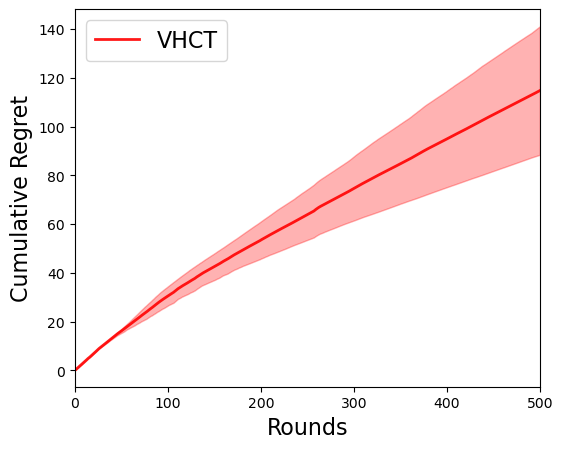

In [5]:
regret_array = np.array(regret_array)
regret_dic = {"regret": [regret_array],
              "labels": ["VHCT"],
              "colors": ['red']}

compare_regret_withsd(regret_dic, x_range=(0, rounds))